<a href="https://colab.research.google.com/github/Mila41/project_01/blob/main/Skillbox_Data_Science_Day_One_24_10_Mike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Нажмите Copy ↑

###1. Скачайте файл с данными: [trips_data.xlsx](https://drive.google.com/file/d/18Hyh1l9H3bR556W1tO2vKwpfAqZPueEp/view?usp=sharing)

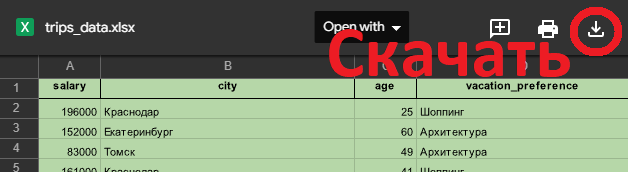

### 2. Загрузите в Colab

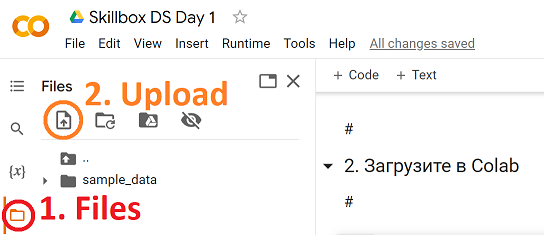

### Python Code:

SyntaxError - ошибка синтаксиса, нарушение правил языка


NameError - ошиблись в написании имени (переменной, фукнции, ...) 

In [ ]:
print("Hello Skillbox, Python is very good")
# Запустить код: Shift+Enter

Hello Skillbox, Python is very good


In [ ]:
import pandas # Подключаем библиотеку Пандас # pip install pandas
# Зачем? Для обработки табличных данных
# DOC: https://pandas.pydata.org/

# read_excel - Функция для чтения эксель-файлов
# trips_data - переменная, в которую попадет таблица
trips_data = pandas.read_excel("/content/trips_data.xlsx")

In [ ]:
trips_data.head(3)  # head - вывести строчки сверху

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney


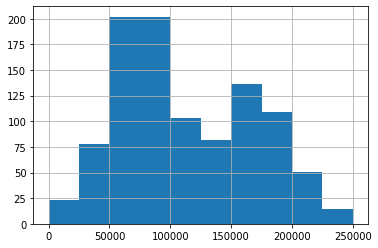

In [ ]:
# ДатаФрейм - таблица (в pandas)

# trips_data.salary - обращение к колонке salary
# trips_data.salary.hist()  - вывод гистограммы зарплат


# trips_data["salary"] - эквивалентное обращение к колонке salary
trips_data.salary.hist()

In [ ]:
# describe - описать (набор данных, с т.з. статистики)
trips_data.age.describe()

count    1000.000000
mean       55.209000
std        11.925164
min        18.000000
25%        50.000000
50%        58.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

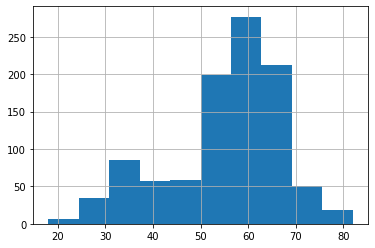

In [ ]:
trips_data.age.hist()

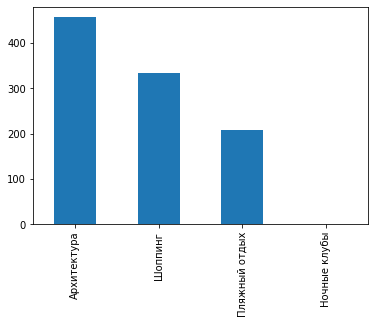

In [ ]:
# vacation_preference - это не число, это слова
# категориальные данные!
# value_counts - все уникальные значения и сколько раз они встречаются
# plot(kind="bar") - нарисовать график данных (kind=bar - столбачатую диаграмму)
trips_data.vacation_preference.value_counts().plot(kind="bar")

In [ ]:
trips_data.city.value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

In [ ]:
# Выборка по условию
# (чуть похоже на SQL)
# trips_data[ условие ]

# Например, всех клиентов с зарплатой до 2000р.
trips_data[ trips_data.salary  < 2000 ]

,salary,city,age,vacation_preference,transport_preference,family_members,target
203,0.0,Краснодар,30.0,Шоппинг,Автомобиль,0.0,Paris


In [ ]:
trips_data[ trips_data.age.between(45, 50)]

,salary,city,age,vacation_preference,transport_preference,family_members,target
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney
15,69000.0,Краснодар,45.0,Архитектура,Морской транспорт,3.0,Tokio
19,97000.0,Краснодар,49.0,Архитектура,Самолет,2.0,Paris
23,103000.0,Краснодар,50.0,Шоппинг,Самолет,2.0,Tokio
44,97000.0,Екатеринбург,46.0,Архитектура,Самолет,0.0,London
...,...,...,...,...,...,...,...
903,94000.0,Минск,46.0,Шоппинг,Автомобиль,1.0,Paris
924,125000.0,Хабаровск,49.0,Архитектура,Самолет,1.0,London
954,135000.0,Краснодар,45.0,Шоппинг,Автомобиль,1.0,Paris
980,86000.0,Томск,48.0,Пляжный отдых,Автомобиль,2.0,Sydney


In [ ]:
# Всех 50летних любителей пляжного отдыха
trips_data[ (trips_data.age == 50) & (trips_data.vacation_preference == "Пляжный отдых")]

,salary,city,age,vacation_preference,transport_preference,family_members,target
66,90000.0,Томск,50.0,Пляжный отдых,Морской транспорт,2.0,Paris
98,63000.0,Томск,50.0,Пляжный отдых,Автомобиль,2.0,Sydney
549,99000.0,Краснодар,50.0,Пляжный отдых,Морской транспорт,3.0,Paris


# Machine Learning

In [ ]:
# Цель: научиться по данным о клиенте предсказывать куда ему лучше полететь

# Обучаем модель на большем кол-ве примеров 
# модель каким-то образом (математичкая магия) находить закономерности в данных
# X = Входные данные, то на основе чего мы делаем предсказания (salary,age, city,... ) 
# y / target = Выходные данные, то что мы предсказываем (target)
# Задача модели: рассмотреть множество примеров (где каждый пример это пара X, y)
# И научиться по X предсказывать y

# .drop выкинуть строчку (axis=0) или колонку (axis=1) таблцы 

X = trips_data.drop("target", axis=1) # Положить в Х, все кроме колонки target
y = trips_data.target

In [ ]:
print(X.shape) # Сколко (строчек, колонок)
print(y.shape)

(1000, 6)
(1000,)


In [ ]:
X.head()

,salary,city,age,vacation_preference,transport_preference,family_members
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0


In [ ]:
# Из категориальнах данных сделать числовые
# Из слов сделать числа:
# get_dummies - превращает одну колонку с "категорией"
# в множество колонок
X_dummies = pandas.get_dummies(X, columns=["city", "vacation_preference", "transport_preference"])

In [ ]:
# Выбрать модель?
# Библиотека? Sklearn? 
# Варианты: Tensorflow, pytorch, keras, h2o, Spark ML, xgboost
# Пробовать разное: разные алгоритмы, разные настройки, разная обработка входных
# Data Science - это про эксперименты

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Популярная модель Машинного Обучения

# RandomForest - Случаный лес деревьев решений
# https://en.akinator.com/
# Классификация = выбрать один из вариантов (London, Paris, New York, Tokyo, Sidney)

rfc = RandomForestClassifier()  # Можно указать настройка
rfc.fit(X_dummies, y)  # .fit = Обучаем модель

RandomForestClassifier()

In [ ]:
# Score - насколько модель хорошо обучилась (изучила учебник = обучающая выборка)
rfc.score(X_dummies, y)

0.999

In [ ]:
# Как получить предсказания? sklearn+pandas

In [ ]:
# пример данных
{ col:[0] for col in X_dummies.columns}

{'salary': [0],
 'age': [0],
 'family_members': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [ ]:
sample = {
 'salary': [130000],
 'age': [53],
 'family_members': [1],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [1],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1]}

example_df = pandas.DataFrame(data=sample, columns = X_dummies.columns)
example_df.head()

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,130000,53,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Предсказание
rfc.predict(example_df)

array(['Sydney'], dtype=object)

In [ ]:
# Что модель думает про вероятность других исходов
print(rfc.predict_proba(example_df))
print(rfc.classes_)

[[0.02 0.06 0.04 0.63 0.25]]
['London' 'New York' 'Paris' 'Sydney' 'Tokio']


# ТГ-чат:
https://t.me/+fIjOAb5UoUwzM2Iy

# Разбор ДЗ

1.   Самых взрослых людей в каждом городе
2.   У кого из любителей Самолетов в среднем больше членов семьи
3.   Кто предпочитает Архитектуру, люди с высокой зарплатой или с низкой
4.   Какой диапазон возрастов (20-30, 30-40, 40-50, 50-60, 60-70, 70-80) имеет самую высокую среднюю зарплату



In [ ]:
# unique - уникальные элементы
trips_data.city.unique()

array(['Краснодар', 'Екатеринбург', 'Томск', 'Новосибирск', 'Минск',
       'Хабаровск', 'Киев', 'Омск', 'Ярославль', 'Петербург', 'Москва'],
      dtype=object)

In [ ]:
# groupby - группировка данных: 
# для каждого уникального значения city -> взять возраст
trips_data.groupby(trips_data.city)['age'].mean()

city
Екатеринбург    60.343284
Киев            54.518868
Краснодар       52.583062
Минск           57.642857
Москва          75.000000
Новосибирск     62.272727
Омск            58.202381
Петербург       65.000000
Томск           54.089888
Хабаровск       56.672897
Ярославль       67.000000
Name: age, dtype: float64

In [ ]:
trips_data[trips_data.transport_preference == 'Самолет'].family_members.mean()

1.429305912596401

In [ ]:
arch = trips_data[trips_data.vacation_preference == 'Архитектура']
non_arch = trips_data[trips_data.vacation_preference != 'Архитектура']

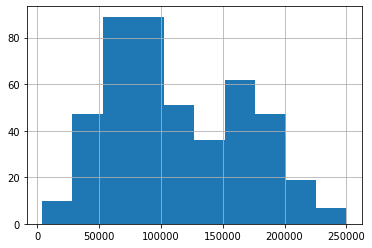

In [ ]:
arch.salary.hist()

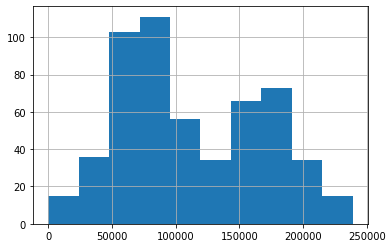

In [ ]:
non_arch.salary.hist()

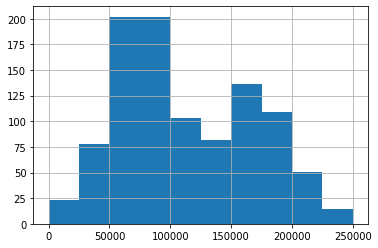

In [ ]:
trips_data.salary.hist()

In [ ]:
trips_data.salary.describe()

count      1000.000000
mean     111935.000000
std       54580.049073
min           0.000000
25%       68000.000000
50%       99000.000000
75%      161000.000000
max      250000.000000
Name: salary, dtype: float64

In [ ]:
arch.salary.describe()

count       457.000000
mean     111787.746171
std       53704.650624
min        4000.000000
25%       69000.000000
50%      100000.000000
75%      160000.000000
max      250000.000000
Name: salary, dtype: float64

In [ ]:
non_arch.salary.describe()

count       543.000000
mean     112058.931860
std       55355.178463
min           0.000000
25%       67500.000000
50%       98000.000000
75%      163000.000000
max      239000.000000
Name: salary, dtype: float64

In [ ]:
trips_data["salary_band"] = (trips_data.salary / 50000).round()

In [ ]:
# 1 - vacation_preference=архитектура
# 0 - vacation_preference=все остальное
trips_data["arch_lover"] = (trips_data.vacation_preference == 'Архитектура').astype(int)
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target,salary_band,arch_lover
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York,4.0,0
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London,3.0,1
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney,2.0,1
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York,3.0,0
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney,3.0,1


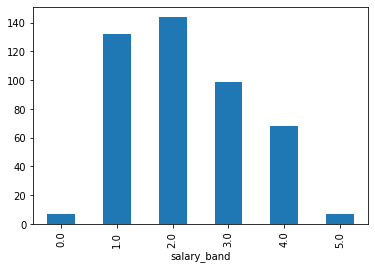

In [ ]:
# Кто предпочитает Архитектуру, люди с высокой зарплатой или с низкой
trips_data.groupby('salary_band')['arch_lover'].sum().plot(kind='bar')

# День2: Временные ряды

*   Временные ряды
*   Matplotlib, Pandas, sklearn
*   Feature Engineering
*   Метрики оценки модели
*   Важность Фич




### Нам понадобятся данные 
Скачайте их здесь:

[Google Drive](https://drive.google.com/file/d/17Be7imiZ6dwsWPACCeuxBDMRm0s9Whaz/view?usp=sharing) / [Yandex Disk](https://disk.yandex.com/d/UOE68m01XuMLzg)



`Источник: https://www.cryptodatadownload.com/data/bitfinex/`

In [ ]:
import pandas as pd

bitcoin = pd.read_csv("/content/BTCUSD_daily.csv", index_col = 0, parse_dates=['date'])

# open - цена в момент открытия торгов 
# close - цена закрытия
# high - самая высокая цена за день
# low - самая низкая

# Volume - объем торгов

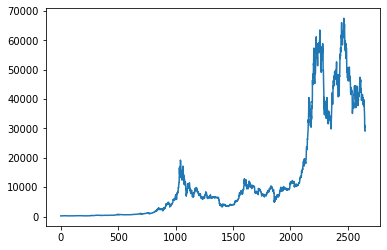

In [ ]:
bitcoin.open.plot()

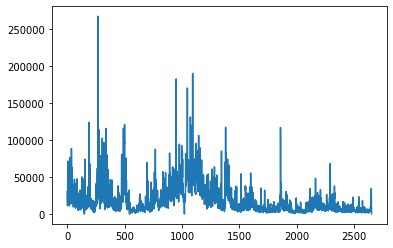

In [ ]:
bitcoin["Volume BTC"].plot()

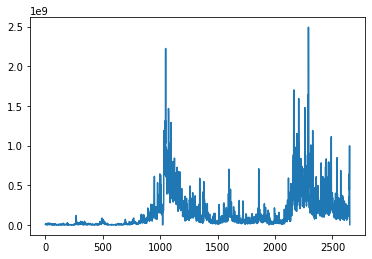

In [ ]:
bitcoin["Volume USD"].plot()

In [ ]:
bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11


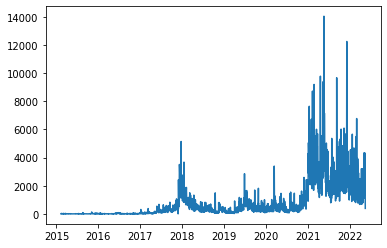

In [ ]:
import matplotlib.pyplot as plt
# Строим график по дате: разница между хай и лоу
plt.plot(bitcoin.date, bitcoin.high - bitcoin.low)
plt.show()

In [ ]:
# Feature Engineering - процесс создания новых колонок в датасете (колонка это Feature, фича), на основе существующих

In [ ]:
# Научиться предсказывать курс валюты на завтра (имея данные на сегодня), т.е. на один день вперед
# На вход = данные, известные на сегодняшний день
# Выход = цена на завтра

In [ ]:
# Новые колонки: скользящее окно
# Например: средняя цена открытия за 7 дней
# shift(1) - свдигает на 1 строчку, в данном случае не включает текущий день в расчет
bitcoin["open_mean_7d"]  =  bitcoin.open.shift(1).rolling(window=7).mean()
bitcoin["max_close_14d"] = bitcoin.close.shift(1).rolling(window=14).max()
bitcoin["min_close_14d"] = bitcoin.close.shift(1).rolling(window=14).min()

In [ ]:
# Возьмем значения close за каждый из последних 7 дней [1, 2, 3, 4, 5, 6, 7]
for day in range(1,8):
    # создаем колонку: какая была цена close по состоянию на {day} дней назад
    bitcoin[f"close_{day}d"] = bitcoin["close"].shift(day)

In [ ]:
# Чистим данные
# Удаляем лишние колонки (axis=1), 
# inplace = 
#    True - поменять текущий датафрейм
#    False(по умолчанию) - создать новый
# bitcoin = bitcoin.drop("symbol", axis=1, inplace=False)

bitcoin.drop("symbol", axis=1, inplace=True)
bitcoin.drop("date", axis=1, inplace=True)
# date
# Идеи: проанализировать, дни недели, месяц

# Избавиться от NaN:
# fillna - заполнить пустоты
# dropna - удалить строчки, содержащие пустоты

bitcoin.fillna(method="backfill", inplace=True)

# interpolate

In [ ]:
# Готовить X,y
# target = цена закрытия на завтра
bitcoin["target"] = bitcoin.close.shift(-1)
# [:-1] - все кроме последней строчки

X = bitcoin[:-1].drop("target", axis=1)
y = bitcoin[:-1].target

# Тренировочная выборка (train, обучающая)
# То, на чем обучаем модель, учебник 
# Модель смотрит на примеры (X_train, y_train) => ищет закономерности

# Тестовая выборка (test, проверочная)
# То, как мы модель проверяем, экзамен
# Попросим модель сделать предсказание (X_test) => y_pred
# Сравним известный нам y_test c y_pred


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print("Train set:")
print(X_train.shape)
print(y_train.shape)

print("Test set:")
print(X_test.shape)
print(y_test.shape)

Train set:
(1776, 16)
(1776,)
Test set:
(875, 16)
(875,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Создаем модель
model.fit(X_train, y_train) # Обучаем
y_pred = model.predict(X_test) # Просим модель предсказать для X_test

In [ ]:
# Насколько модель ошиблась: (y_pred - y_test)
# Средняя ошибка (y_pred - y_test).mean()

# Средняя абсолютная ошибка:
mae = (y_pred - y_test).abs().mean()
# {mae:.0f} - только целую часть выводим
print(f"В среднем модель ошиблась на {mae:.0f} долларов в день")

В среднем модель ошиблась на 393 долларов в день


## То же самое, но для RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # Создаем модель
model.fit(X_train, y_train) # Обучаем
y_pred = model.predict(X_test) # Просим модель предсказать для X_test
mae = (y_pred - y_test).abs().mean()
print(f"В среднем модель ошиблась на {mae:.0f} долларов в день")

В среднем модель ошиблась на 407 долларов в день


In [ ]:
from sklearn.metrics import mean_absolute_error, max_error
print("mae = ", mean_absolute_error(y_test, y_pred))
print("max = ", max_error(y_test, y_pred))

mae =  406.94462220451675
max =  7285.288680257196


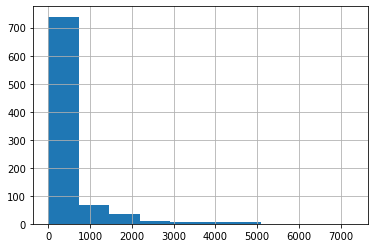

In [ ]:
(y_pred - y_test).abs().hist()

# День 3

## Кросс-валидация

**Инструменты Sklearn:**
1.   `cross_val_score`
2.   `GridSearchCV`





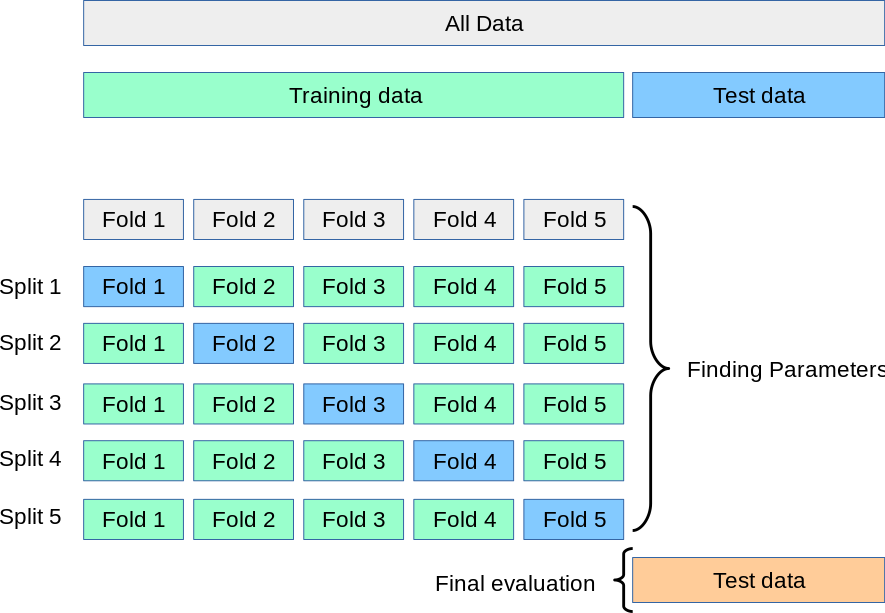

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
}

## Деревья Решений

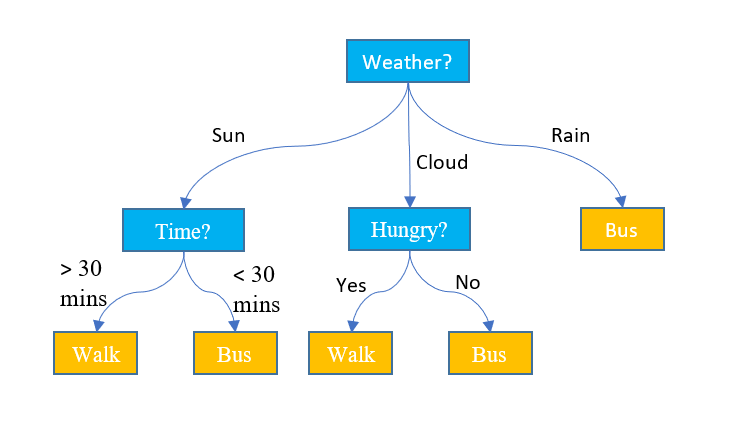

**Akinator** :https://en.akinator.com/game

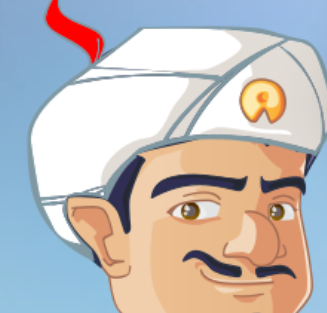

**Visual Introduction to statistical classification / decision trees**:
http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

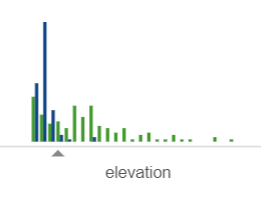

# Градиентный спуск

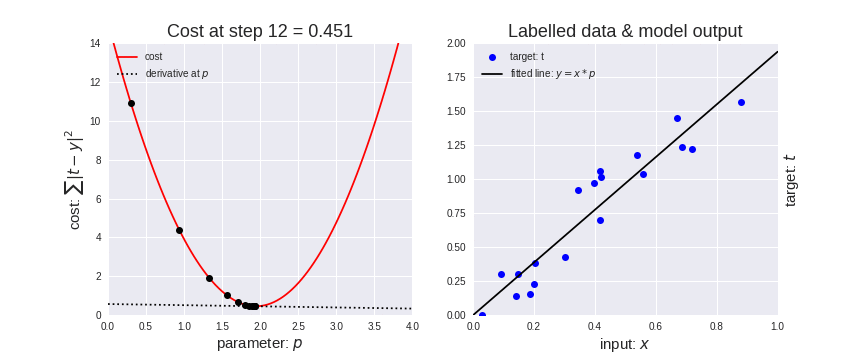